## Bering NCEP/NCAR Reanalysis MSLP data for Bering Sea region

In [ ]:
%matplotlib inline

In [2]:
#using xarray for data read
import xarray as xa
from netCDF4 import num2date
import numpy as np

#using Cartopy for mapping
import matplotlib.pyplot as plt
import cmocean

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io import shapereader
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

def make_map(projection=ccrs.PlateCarree()):
    fig, ax = plt.subplots(figsize=(13, 8),
                           subplot_kw=dict(projection=projection))
    gl = ax.gridlines(draw_labels=True)
    gl.xlabels_top = gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    return fig, ax

land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor='1.0')

/Volumes/WDC_internal/Users/bell/anaconda2/lib/python2.7/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


Gather data from ESRL THREDDS server for Reanalysis II mslp data

NCEP/DOE 2 Reanalysis data provided by the NOAA/OAR/ESRL PSD, Boulder, Colorado, USA, from their Web site at http://www.esrl.noaa.gov/psd/ 

In [54]:
threddspath='https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis2.dailyavgs/surface/'

tfile = 'mslp.1979.nc'

The mask/scale function didn't work on readin of the esrl file... error is that \_Fillvalue and missing_value are different.  scale must be applied independantly or missing value should be properly set

In [79]:
### list of doy groupings for 8 day averages
doy_start = [335,343,351,359,2,10,18,26]
doy_end = [342,350,358,1,9,17,25,33]

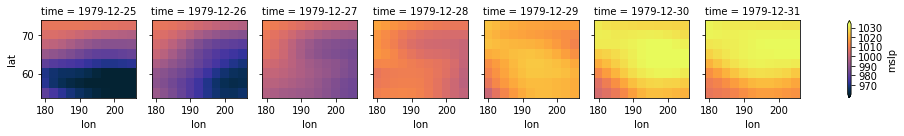

In [267]:
cmap = cmocean.cm.thermal
with xa.open_dataset(threddspath+tfile, concat_characters=True, mask_and_scale=False, decode_times=True, decode_coords=True, drop_variables=None) as xadf:
    pd = xdf.isel(time=slice(-7,None),lat=slice(7,15),lon=slice(72,83))
    pd =xa.decode_cf(pd,mask_and_scale=False,decode_times=True)
    facet = ((pd['mslp']+pd.mslp.add_offset)/100.).plot(x='lon', y='lat', col='time',col_wrap=7,robust=True,figsize=(14,2),cmap=cmap)

In [247]:
xadf = xa.open_dataset(threddspath+tfile, decode_cf=False)

pd = xdf.isel(time=slice(335,342+1),lat=slice(7,15),lon=slice(72,83))

In [248]:
#map to cf conventions
pd =xa.decode_cf(pd,mask_and_scale=False,decode_times=True)

In [249]:
pd['mslp'] = (pd['mslp']+pd.mslp.add_offset)/100.
eightday = pd.groupby(pd['time.dayofyear']).mean('time')
eightdayave = eightday.mslp.mean('dayofyear')

reshaping the gridded data (lat: 11, lon:8) -> lon1,lat1;lon1,lat2;lon1,lat3...

In [266]:
size = 1
for dim in np.shape(eightdayave): size *= dim

f_handle = file('tmp.txt', 'a')
np.savetxt(f_handle, eightdayave.data.reshape(1,size),delimiter=',')
f_handle.close()


In [257]:
print eightdayave.lon.data

[ 180.   182.5  185.   187.5  190.   192.5  195.   197.5  200.   202.5
  205. ]


In [258]:
print eightdayave.lat.data

[ 72.5  70.   67.5  65.   62.5  60.   57.5  55. ]
